w = exp(-6.5*ob1) w/ smearing on all

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import energyflow as ef
import energyflow.archs
import root_numpy
from sklearn.utils import shuffle

import omnifold
import modplot
import ibu

Welcome to JupyROOT 6.22/02


In [2]:
n_row = 20000

In [3]:
np.random.seed(0)

In [4]:
ob1 = np.random.random_sample((n_row,))
ob2 = np.arctan(ob1+1)
obs1 = ob1*(1+np.random.normal(loc=0, scale=0.1, size=len(ob1)))
obs2 = ob2*(1+np.random.normal(loc=0, scale=0.15, size=len(ob2)))
w = np.exp(-6.5*ob1)
relw = w/min(w)

In [5]:
print(min(ob1),max(ob1))
print(min(ob2),max(ob2))
print(min(obs1),max(obs1))
print(min(obs2),max(obs2))

7.2449638492178e-05 0.9999779517807228
0.7854343869044885 1.1071443081113448
7.416121571027753e-05 1.3141270511370569
0.22029107868137243 1.6869186517442716


In [6]:
data = []

data.append(ob1)
data.append(ob2)
data.append(obs1)
data.append(obs2)
data.append(relw)

df = pd.DataFrame(np.transpose(data), columns=['ob1','ob2','ob1s','ob2s','relw'])

In [7]:
odd = []
even = []
for i in range(0, df.shape[0]):
    if (i%2 == 0):
        even.append(i)
    else:
        odd.append(i)

In [8]:
df1 = df.iloc[odd]

In [9]:
df2 = df.iloc[even]

In [10]:
df3 = shuffle(df1.loc[df1.index.repeat(round(df1.relw))])

In [11]:
df4 = shuffle(df2.loc[df2.index.repeat(round(df2.relw))])

In [12]:
def smear(df, var):
    if var in df.columns:
        array = np.asarray(df[var])
        array_new = (1+np.random.normal(loc=0, scale=0.001,size=len(array)))*array
        df['new'+var]=array_new
    arrays = np.asarray(df[var+'s'])
    arrays_new = (1+np.random.normal(loc=0, scale=0.001,size=len(arrays)))*arrays
    df['new'+var+'s']=arrays_new
    print("Done smearing " + var)
    return df

In [13]:
smear(df3, 'ob1')
smear(df3, 'ob2')
smear(df4, 'ob1')
smear(df4, 'ob2')

Done smearing ob1
Done smearing ob2
Done smearing ob1
Done smearing ob2


,ob1,ob2,ob1s,ob2s,relw,newob1,newob1s,newob2,newob2s
2428,0.005510,0.788146,0.004452,0.818783,641.647332,0.005514,0.004454,0.786843,0.819027
16074,0.080281,0.823971,0.067778,0.771314,394.661110,0.080226,0.067746,0.823563,0.770212
15440,0.829660,1.070606,0.829479,0.737069,3.025475,0.827775,0.829277,1.069646,0.737054
6914,0.239123,0.891788,0.219654,0.981305,140.548981,0.239065,0.219748,0.893279,0.982989
18494,0.002827,0.786810,0.002905,0.728151,652.938012,0.002825,0.002903,0.787465,0.727901
...,...,...,...,...,...,...,...,...,...
6170,0.029243,0.799808,0.028330,0.865443,549.923499,0.029238,0.028339,0.798349,0.865828
10078,0.165697,0.861759,0.137822,0.765332,226.518427,0.166065,0.137751,0.860650,0.765186
11710,0.202049,0.876897,0.193526,0.856168,178.848072,0.202081,0.193320,0.874288,0.856484
7484,0.190514,0.872152,0.187294,1.161484,192.772839,0.190573,0.186970,0.872798,1.161874


In [14]:
ob1low = 0
ob1high = 1.5
ob2low = 0.4
ob2high = 1.4
nbin = 20
binwidth1 = (ob1high-ob1low)/nbin
binwidth2 = (ob2high-ob2low)/nbin

Text(0.5, 0, 'detector ob2')

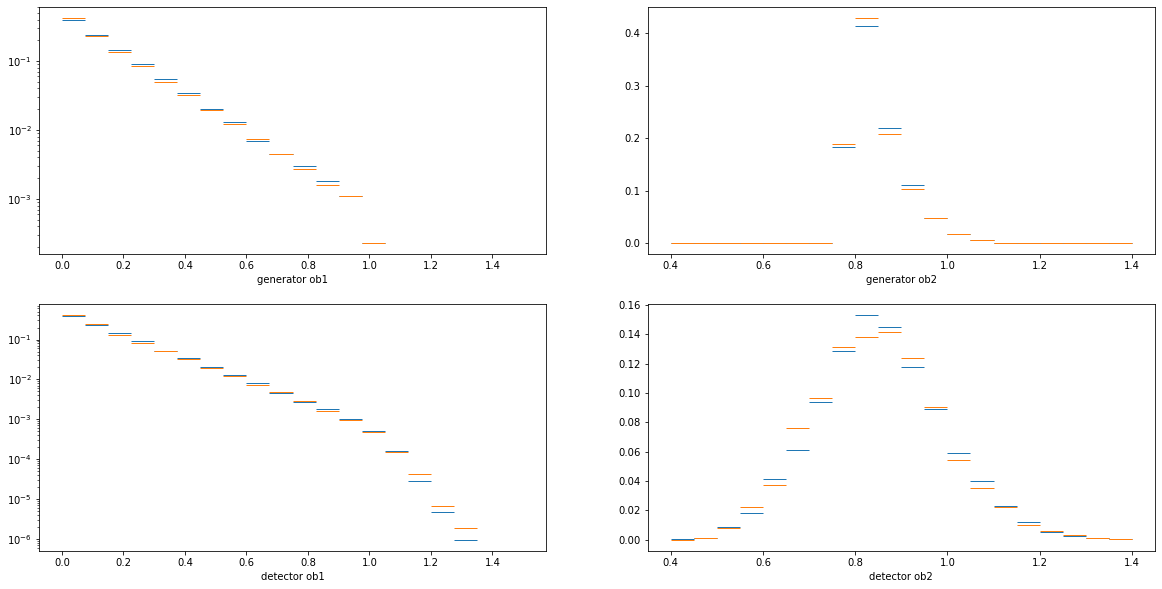

In [15]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(221)
y3 = np.histogram(df3['newob1'], range=(ob1low,ob1high), bins=nbin)[0]
y4 = np.histogram(df4['newob1'], range=(ob1low,ob1high), bins=nbin)[0]
xerr1 = (ob1high-ob1low)/(2*nbin)
plt.errorbar(np.arange(ob1low+xerr1,ob1high+xerr1,binwidth1), y3/sum(y3), xerr=xerr1,ls='none', linewidth=1)
plt.errorbar(np.arange(ob1low+xerr1,ob1high+xerr1,binwidth1), y4/sum(y4), xerr=xerr1,ls='none', linewidth=1)
#plt.errorbar(np.arange(ptlow+xerr1,pthigh+xerr1), y3/sum(y3), xerr=xerr1, yerr=np.sqrt(y3)/sum(y3),ls='none', linewidth=1)
#plt.errorbar(np.arange(ptlow+xerr1,pthigh+xerr1), y4/sum(y4), xerr=xerr1, yerr=np.sqrt(y4)/sum(y4),ls='none', linewidth=1)
plt.xlabel('generator ob1')
plt.yscale('log')

ax2 = plt.subplot(222)
y3 = np.histogram(df3['newob2'], range=(ob2low,ob2high), bins=nbin)[0]
y4 = np.histogram(df4['newob2'], range=(ob2low,ob2high), bins=nbin)[0]
xerr2 = (ob2high-ob2low)/(2*nbin)
plt.errorbar(np.arange(ob2low+xerr2,ob2high+xerr2,binwidth2), y3/sum(y3), xerr=xerr2,ls='none', linewidth=1)
plt.errorbar(np.arange(ob2low+xerr2,ob2high+xerr2,binwidth2), y4/sum(y4), xerr=xerr2,ls='none', linewidth=1)
#plt.errorbar(np.arange(rglow+xerr1,rghigh+xerr1,2*xerr1), y3/sum(y3), xerr=xerr1,yerr=np.sqrt(y3)/sum(y3),ls='none',linewidth=1)
#plt.errorbar(np.arange(rglow+xerr1,rghigh+xerr1,2*xerr1), y4/sum(y4), xerr=xerr1,yerr=np.sqrt(y4)/sum(y4),ls='none',linewidth=1)
plt.xlabel('generator ob2')

ax3 = plt.subplot(223)
y3 = np.histogram(df3['newob1s'], range=(ob1low,ob1high), bins=nbin)[0]
y4 = np.histogram(df4['newob1s'], range=(ob1low,ob1high), bins=nbin)[0]
xerr1 = (ob1high-ob1low)/(2*nbin)
plt.errorbar(np.arange(ob1low+xerr1,ob1high+xerr1,binwidth1), y3/sum(y3), xerr=xerr1,ls='none', linewidth=1)
plt.errorbar(np.arange(ob1low+xerr1,ob1high+xerr1,binwidth1), y4/sum(y4), xerr=xerr1,ls='none', linewidth=1)
#plt.errorbar(np.arange(mlow+xerr1,mhigh+xerr1), y3/sum(y3), xerr=xerr1, yerr=np.sqrt(y3)/sum(y3),ls='none', linewidth=1)
#plt.errorbar(np.arange(mlow+xerr1,mhigh+xerr1), y4/sum(y4), xerr=xerr1, yerr=np.sqrt(y4)/sum(y4),ls='none', linewidth=1)
plt.xlabel('detector ob1')
plt.yscale('log')

ax4 = plt.subplot(224)
y3 = np.histogram(df3['newob2s'], range=(ob2low,ob2high), bins=nbin)[0]
y4 = np.histogram(df4['newob2s'], range=(ob2low,ob2high), bins=nbin)[0]
xerr2 = (ob2high-ob2low)/(2*nbin)
plt.errorbar(np.arange(ob2low+xerr2,ob2high+xerr2,binwidth2), y3/sum(y3), xerr=xerr2,ls='none', linewidth=1)
plt.errorbar(np.arange(ob2low+xerr2,ob2high+xerr2,binwidth2), y4/sum(y4), xerr=xerr2,ls='none', linewidth=1)
#plt.errorbar(np.arange(ptlow+xerr1,pthigh+xerr1), y3/sum(y3), xerr=xerr1, yerr=np.sqrt(y3)/sum(y3),ls='none', linewidth=1)
#plt.errorbar(np.arange(ptlow+xerr1,pthigh+xerr1), y4/sum(y4), xerr=xerr1, yerr=np.sqrt(y4)/sum(y4),ls='none', linewidth=1)
plt.xlabel('detector ob2')

In [16]:
df3.shape[0],df4.shape[0]

(1038153, 1069427)

In [17]:
datasets = { 'pythia' : df3, 'data' : df4 }

In [18]:
max(relw)

664.7332045066404

In [19]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = '8'

In [20]:
itnum = 4

In [21]:
obs_multifold = ['newob1','newob2']

In [22]:
obs = {}

obs.setdefault('newob1', {}).update({
    'func': lambda dset, s: np.asarray(datasets[dset]['newob1'+s]),
    'nbins_det': 20, 'nbins_mc': 20,
    'xlim': (ob1low, ob1high), 'ylim': (0.00001, 100),
    'xlabel': r'ob1','symbol': 'ob1',
    'ylabel': '' ,
    'yscale': 'log'
})

obs.setdefault('newob2', {}).update({
    'func': lambda dset, s: np.asarray(datasets[dset]['newob2'+s]),
    'nbins_det': 20, 'nbins_mc': 20,
    'xlim': (0.5, 1.5), 'ylim': (0.00001, 10),
    'xlabel': r'ob2','symbol': 'ob2',
    'ylabel': '' 
    #'yscale': 'log'
})

# additional histogram and plot style information
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
gen_style = {'linestyle': '--', 'color': 'blue', 'lw': 1.15, 'label': 'PYTHIA truth'}
truth_style = {'step': 'mid', 'edgecolor': 'green', 'facecolor': (0.75, 0.875, 0.75),
               'lw': 1.25, 'zorder': 0, 'label': '``Truth\"'}
ibu_style = {'ls': '-', 'marker': 'o', 'ms': 2.5, 'color': 'gray', 'zorder': 1}
omnifold_style = {'ls': '-', 'marker': 's', 'ms': 2.5, 'color': 'tab:red', 'zorder': 3}

In [23]:
# calculate quantities to be stored in obs
for obkey,ob in obs.items():
    
    # calculate observable for GEN, SIM, DATA, and TRUE
    ob['genobs'], ob['simobs'] = ob['func']('pythia', ''), ob['func']('pythia', 's')
    ob['truthobs'], ob['dataobs'] = ob['func']('data', ''), ob['func']('data', 's')
    
    print(ob['genobs'])
    # setup bins
    ob['bins_det'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_det']+1)
    ob['bins_mc'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_mc']+1)
    ob['midbins_det'] = (ob['bins_det'][:-1] + ob['bins_det'][1:])/2
    ob['midbins_mc'] = (ob['bins_mc'][:-1] + ob['bins_mc'][1:])/2
    ob['binwidth_det'] = ob['bins_det'][1] - ob['bins_det'][0]
    ob['binwidth_mc'] = ob['bins_mc'][1] - ob['bins_mc'][0]
    
    # get the histograms of GEN, DATA, and TRUTH level observables
    ob['genobs_hist'] = np.histogram(ob['genobs'], bins=ob['bins_mc'], density=True)[0]
    ob['data_hist'] = np.histogram(ob['dataobs'], bins=ob['bins_det'], density=True)[0]
    ob['truth_hist'], ob['truth_hist_unc'] = modplot.calc_hist(ob['truthobs'], bins=ob['bins_mc'], 
                                                               density=True)[:2]

    # compute (and normalize) the response matrix between GEN and SIM
    ob['response'] = np.histogram2d(ob['simobs'], ob['genobs'], bins=(ob['bins_det'], ob['bins_mc']))[0]
    ob['response'] /= (ob['response'].sum(axis=0) + 10**-50)
    
    # perform iterative Bayesian unfolding
    ob['ibu_phis'] = ibu.ibu(ob['data_hist'], ob['response'], ob['genobs_hist'], 
                         ob['binwidth_det'], ob['binwidth_mc'], it=itnum)
    ob['ibu_phi_unc'] = ibu.ibu_unc(ob, it=itnum, nresamples=25)
    
    print('Done with', obkey)

[0.00469714 0.02522937 0.09286944 ... 0.19688166 0.22496417 0.10706803]
Done with newob1
[0.78778189 0.79731154 0.8293757  ... 0.87478437 0.88627636 0.83582654]
Done with newob2


In [24]:
#model_layer_sizes = [100, 100]
model_layer_sizes = [100, 100, 100] # use this for the full network size

# set up the array of data/simulation detector-level observables
X_det = np.asarray([np.concatenate((obs[obkey]['dataobs'], obs[obkey]['simobs'])) for obkey in obs_multifold]).T
Y_det = ef.utils.to_categorical(np.concatenate((np.ones(len(obs['newob1']['dataobs'])), 
                                                np.zeros(len(obs['newob1']['simobs'])))))

# set up the array of generation particle-level observables
X_gen = np.asarray([np.concatenate((obs[obkey]['genobs'], obs[obkey]['genobs'])) for obkey in obs_multifold]).T
Y_gen = ef.utils.to_categorical(np.concatenate((np.ones(len(obs['newob1']['genobs'])), 
                                                np.zeros(len(obs['newob1']['genobs'])))))

# standardize the inputs
X_det = (X_det - np.mean(X_det, axis=0))/np.std(X_det, axis=0)
X_gen = (X_gen - np.mean(X_gen, axis=0))/np.std(X_gen, axis=0)

# Specify the training parameters
# model parameters for the Step 1 network
det_args = {'input_dim': len(obs_multifold), 'dense_sizes': model_layer_sizes,
            'patience': 10, 'filepath': 'Step1_{}', 'save_weights_only': False, 
            'modelcheck_opts': {'save_best_only': True, 'verbose': 1}}

# model parameters for the Step 2 network
mc_args = {'input_dim': len(obs_multifold), 'dense_sizes': model_layer_sizes, 
           'patience': 10, 'filepath': 'Step2_{}', 'save_weights_only': False, 
           'modelcheck_opts': {'save_best_only': True, 'verbose': 1}}

# general training parameters
#fitargs = {'batch_size': 500, 'epochs': 2, 'verbose': 1}
fitargs = {'batch_size': 500, 'epochs': 100, 'verbose': 1} # use this for a full training

# reweight the sim and data to have the same total weight to begin with
ndata, nsim = np.count_nonzero(
    Y_det[:,1]), np.count_nonzero(Y_det[:,0])
wdata = np.ones(ndata)
winit = ndata/nsim*np.ones(nsim)

In [25]:
# apply the OmniFold procedure to get weights for the generation
multifold_ws = omnifold.omnifold(X_gen, Y_gen, X_det, Y_det, wdata, winit,
                                (ef.archs.DNN, det_args), (ef.archs.DNN, mc_args),
                                fitargs, val=0.2, it=itnum, trw_ind=-2, weights_filename='5311618')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
dense_0 (Dense)              (None, 100)               300       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)              

Epoch 13/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.6194 - acc: 0.6390
Epoch 00013: val_loss did not improve from 0.62401
3373/3373 [==============================] - 12s 3ms/step - loss: 0.6194 - acc: 0.6390 - val_loss: 0.6273 - val_acc: 0.6346
Epoch 14/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.6155 - acc: 0.6431
Epoch 00014: val_loss improved from 0.62401 to 0.61666, saving model to Step1_0_Epoch-14
INFO:tensorflow:Assets written to: Step1_0_Epoch-14/assets
3373/3373 [==============================] - 12s 4ms/step - loss: 0.6155 - acc: 0.6431 - val_loss: 0.6167 - val_acc: 0.6405
Epoch 15/100
3360/3373 [============================>.] - ETA: 0s - loss: 0.6115 - acc: 0.6467
Epoch 00015: val_loss improved from 0.61666 to 0.61208, saving model to Step1_0_Epoch-15
INFO:tensorflow:Assets written to: Step1_0_Epoch-15/assets
3373/3373 [==============================] - 13s 4ms/step - loss: 0.6115 - acc: 0.6467 - val_loss: 0.6121 - val_acc: 0.6

INFO:tensorflow:Assets written to: Step1_0_Epoch-37/assets
3373/3373 [==============================] - 12s 4ms/step - loss: 0.5561 - acc: 0.6920 - val_loss: 0.5517 - val_acc: 0.6965
Epoch 38/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.5543 - acc: 0.6937
Epoch 00038: val_loss did not improve from 0.55169
3373/3373 [==============================] - 12s 3ms/step - loss: 0.5543 - acc: 0.6937 - val_loss: 0.5601 - val_acc: 0.6866
Epoch 39/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.5527 - acc: 0.6950
Epoch 00039: val_loss improved from 0.55169 to 0.54288, saving model to Step1_0_Epoch-39
INFO:tensorflow:Assets written to: Step1_0_Epoch-39/assets
3373/3373 [==============================] - 13s 4ms/step - loss: 0.5526 - acc: 0.6950 - val_loss: 0.5429 - val_acc: 0.7027
Epoch 40/100
3365/3373 [============================>.] - ETA: 0s - loss: 0.5508 - acc: 0.6963
Epoch 00040: val_loss did not improve from 0.54288
3373/3373 [=======================

3361/3373 [============================>.] - ETA: 0s - loss: 0.5211 - acc: 0.7167
Epoch 00065: val_loss did not improve from 0.51758
3373/3373 [==============================] - 12s 4ms/step - loss: 0.5211 - acc: 0.7167 - val_loss: 0.5214 - val_acc: 0.7184
Epoch 66/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.5201 - acc: 0.7177
Epoch 00066: val_loss did not improve from 0.51758
3373/3373 [==============================] - 12s 4ms/step - loss: 0.5201 - acc: 0.7177 - val_loss: 0.5248 - val_acc: 0.7161
Epoch 67/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.5189 - acc: 0.7180
Epoch 00067: val_loss did not improve from 0.51758
3373/3373 [==============================] - 12s 4ms/step - loss: 0.5189 - acc: 0.7180 - val_loss: 0.5193 - val_acc: 0.7182
Epoch 68/100
3360/3373 [============================>.] - ETA: 0s - loss: 0.5181 - acc: 0.7187
Epoch 00068: val_loss did not improve from 0.51758
3373/3373 [==============================] - 12s 4ms/step

Epoch 94/100
3360/3373 [============================>.] - ETA: 0s - loss: 0.4970 - acc: 0.7326
Epoch 00094: val_loss did not improve from 0.49171
3373/3373 [==============================] - 12s 4ms/step - loss: 0.4970 - acc: 0.7326 - val_loss: 0.4979 - val_acc: 0.7303
Epoch 95/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.4959 - acc: 0.7333
Epoch 00095: val_loss did not improve from 0.49171
3373/3373 [==============================] - 12s 4ms/step - loss: 0.4959 - acc: 0.7333 - val_loss: 0.5064 - val_acc: 0.7290
Epoch 96/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.4954 - acc: 0.7334
Epoch 00096: val_loss improved from 0.49171 to 0.48818, saving model to Step1_0_Epoch-96
INFO:tensorflow:Assets written to: Step1_0_Epoch-96/assets
3373/3373 [==============================] - 13s 4ms/step - loss: 0.4954 - acc: 0.7334 - val_loss: 0.4882 - val_acc: 0.7368
Epoch 97/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.4948 - acc: 0.733

/vast/palmer/home.grace/ys668/analysis/run12/data/unfolding/toy/omnifold.py:32: RuntimeWarning: divide by zero encountered in true_divide
  w *= np.clip(preds/(1 - preds + 10**-50), fitargs.get('weight_clip_min', 0.), fitargs.get('weight_clip_max', np.inf))


Epoch 1/100
3309/3323 [============================>.] - ETA: 0s - loss: 0.6992 - acc: 0.5004
Epoch 00001: val_loss improved from inf to 0.72600, saving model to Step2_0_Epoch-1
INFO:tensorflow:Assets written to: Step2_0_Epoch-1/assets
3323/3323 [==============================] - 49s 15ms/step - loss: 0.6991 - acc: 0.5004 - val_loss: 0.7260 - val_acc: 0.5000
Epoch 2/100
3312/3323 [============================>.] - ETA: 0s - loss: 0.6993 - acc: 0.4999
Epoch 00002: val_loss did not improve from 0.72600
3323/3323 [==============================] - 12s 4ms/step - loss: 0.6991 - acc: 0.4999 - val_loss: 0.7420 - val_acc: 0.5000
Epoch 3/100
3313/3323 [============================>.] - ETA: 0s - loss: 0.6925 - acc: 0.5002
Epoch 00003: val_loss did not improve from 0.72600
3323/3323 [==============================] - 12s 4ms/step - loss: 0.6929 - acc: 0.5002 - val_loss: 0.7371 - val_acc: 0.5000
Epoch 4/100
3313/3323 [============================>.] - ETA: 0s - loss: 0.6973 - acc: 0.5003
Epoch 0

3358/3373 [============================>.] - ETA: 0s - loss: 0.4665 - acc: 0.7361
Epoch 00007: val_loss did not improve from 0.46574
3373/3373 [==============================] - 12s 4ms/step - loss: 0.4665 - acc: 0.7361 - val_loss: 0.4757 - val_acc: 0.7273
Epoch 8/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.4661 - acc: 0.7367
Epoch 00008: val_loss improved from 0.46574 to 0.46546, saving model to Step1_1_Epoch-8
INFO:tensorflow:Assets written to: Step1_1_Epoch-8/assets
3373/3373 [==============================] - 13s 4ms/step - loss: 0.4661 - acc: 0.7367 - val_loss: 0.4655 - val_acc: 0.7342
Epoch 9/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.4656 - acc: 0.7371
Epoch 00009: val_loss did not improve from 0.46546
3373/3373 [==============================] - 12s 4ms/step - loss: 0.4655 - acc: 0.7372 - val_loss: 0.4790 - val_acc: 0.7348
Epoch 10/100
3359/3373 [============================>.] - ETA: 0s - loss: 0.4652 - acc: 0.7368
Epoch 00010: va

Epoch 10/100
3312/3323 [============================>.] - ETA: 0s - loss: 0.6788 - acc: 0.5000
Epoch 00010: val_loss did not improve from 0.67665
3323/3323 [==============================] - 12s 4ms/step - loss: 0.6786 - acc: 0.5000 - val_loss: 0.6809 - val_acc: 0.5000
Epoch 11/100
3313/3323 [============================>.] - ETA: 0s - loss: 0.6800 - acc: 0.5000
Epoch 00011: val_loss did not improve from 0.67665
3323/3323 [==============================] - 12s 4ms/step - loss: 0.6800 - acc: 0.4999 - val_loss: 0.6781 - val_acc: 0.5000
Epoch 12/100
3311/3323 [============================>.] - ETA: 0s - loss: 0.6778 - acc: 0.5004
Epoch 00012: val_loss did not improve from 0.67665
3323/3323 [==============================] - 12s 4ms/step - loss: 0.6778 - acc: 0.5003 - val_loss: 0.6818 - val_acc: 0.5000
Epoch 13/100
3312/3323 [============================>.] - ETA: 0s - loss: 0.6805 - acc: 0.4995
Epoch 00013: val_loss did not improve from 0.67665
3323/3323 [==============================] -

3366/3373 [============================>.] - ETA: 0s - loss: 0.4739 - acc: 0.7434
Epoch 00010: val_loss did not improve from 0.47284
3373/3373 [==============================] - 12s 4ms/step - loss: 0.4739 - acc: 0.7434 - val_loss: 0.4748 - val_acc: 0.7420
Epoch 11/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.4733 - acc: 0.7437
Epoch 00011: val_loss improved from 0.47284 to 0.46649, saving model to Step1_2_Epoch-11
INFO:tensorflow:Assets written to: Step1_2_Epoch-11/assets
3373/3373 [==============================] - 13s 4ms/step - loss: 0.4733 - acc: 0.7437 - val_loss: 0.4665 - val_acc: 0.7455
Epoch 12/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.4727 - acc: 0.7444
Epoch 00012: val_loss did not improve from 0.46649
3373/3373 [==============================] - 12s 3ms/step - loss: 0.4728 - acc: 0.7444 - val_loss: 0.4841 - val_acc: 0.7384
Epoch 13/100
3360/3373 [============================>.] - ETA: 0s - loss: 0.4724 - acc: 0.7437
Epoch 00013

3312/3323 [============================>.] - ETA: 0s - loss: 0.8018 - acc: 0.5001
Epoch 00010: val_loss did not improve from 0.80590
3323/3323 [==============================] - 12s 3ms/step - loss: 0.8017 - acc: 0.5001 - val_loss: 0.8752 - val_acc: 0.5000
Epoch 11/100
3313/3323 [============================>.] - ETA: 0s - loss: 0.8020 - acc: 0.5001
Epoch 00011: val_loss did not improve from 0.80590
3323/3323 [==============================] - 12s 3ms/step - loss: 0.8018 - acc: 0.5001 - val_loss: 0.8781 - val_acc: 0.5000
Epoch 12/100
3313/3323 [============================>.] - ETA: 0s - loss: 0.7993 - acc: 0.5001
Epoch 00012: val_loss did not improve from 0.80590
3323/3323 [==============================] - 12s 3ms/step - loss: 0.7990 - acc: 0.5001 - val_loss: 0.8159 - val_acc: 0.5000
Epoch 13/100
3313/3323 [============================>.] - ETA: 0s - loss: 0.7704 - acc: 0.4998
Epoch 00013: val_loss did not improve from 0.80590
3323/3323 [==============================] - 12s 4ms/step

Epoch 1/100
3360/3373 [============================>.] - ETA: 0s - loss: 0.5955 - acc: 0.7125
Epoch 00001: val_loss improved from inf to 0.72856, saving model to Step1_3_Epoch-1
INFO:tensorflow:Assets written to: Step1_3_Epoch-1/assets
3373/3373 [==============================] - 49s 14ms/step - loss: 0.5955 - acc: 0.7125 - val_loss: 0.7286 - val_acc: 0.7001
Epoch 2/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.5527 - acc: 0.7195
Epoch 00002: val_loss improved from 0.72856 to 0.53025, saving model to Step1_3_Epoch-2
INFO:tensorflow:Assets written to: Step1_3_Epoch-2/assets
3373/3373 [==============================] - 12s 4ms/step - loss: 0.5526 - acc: 0.7195 - val_loss: 0.5303 - val_acc: 0.7282
Epoch 3/100
3360/3373 [============================>.] - ETA: 0s - loss: 0.5444 - acc: 0.7210
Epoch 00003: val_loss did not improve from 0.53025
3373/3373 [==============================] - 12s 3ms/step - loss: 0.5445 - acc: 0.7210 - val_loss: 0.5556 - val_acc: 0.7202
Epoch 

Epoch 29/100
3360/3373 [============================>.] - ETA: 0s - loss: 0.5268 - acc: 0.7293
Epoch 00029: val_loss improved from 0.50367 to 0.50062, saving model to Step1_3_Epoch-29
INFO:tensorflow:Assets written to: Step1_3_Epoch-29/assets
3373/3373 [==============================] - 13s 4ms/step - loss: 0.5267 - acc: 0.7293 - val_loss: 0.5006 - val_acc: 0.7336
Epoch 30/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.5203 - acc: 0.7307
Epoch 00030: val_loss did not improve from 0.50062
3373/3373 [==============================] - 12s 3ms/step - loss: 0.5203 - acc: 0.7307 - val_loss: 0.5190 - val_acc: 0.7285
Epoch 31/100
3361/3373 [============================>.] - ETA: 0s - loss: 0.5174 - acc: 0.7307
Epoch 00031: val_loss improved from 0.50062 to 0.49389, saving model to Step1_3_Epoch-31
INFO:tensorflow:Assets written to: Step1_3_Epoch-31/assets
3373/3373 [==============================] - 13s 4ms/step - loss: 0.5173 - acc: 0.7308 - val_loss: 0.4939 - val_acc: 0.7

Epoch 16/100
3313/3323 [============================>.] - ETA: 0s - loss: 1.1681 - acc: 0.5001
Epoch 00016: val_loss did not improve from 6.21912
3323/3323 [==============================] - 12s 3ms/step - loss: 1.1671 - acc: 0.5001 - val_loss: 13.7453 - val_acc: 0.5000
Epoch 17/100
3313/3323 [============================>.] - ETA: 0s - loss: 1.2153 - acc: 0.5001
Epoch 00017: val_loss did not improve from 6.21912
3323/3323 [==============================] - 12s 4ms/step - loss: 1.2143 - acc: 0.5001 - val_loss: 16.8433 - val_acc: 0.5000
Epoch 18/100
3313/3323 [============================>.] - ETA: 0s - loss: 1.0321 - acc: 0.5004
Epoch 00018: val_loss did not improve from 6.21912
3323/3323 [==============================] - 12s 4ms/step - loss: 1.0316 - acc: 0.5004 - val_loss: 6.7806 - val_acc: 0.5000
Epoch 19/100
3313/3323 [============================>.] - ETA: 0s - loss: 1.0125 - acc: 0.5001
Epoch 00019: val_loss did not improve from 6.21912
3323/3323 [==============================]

Epoch 45/100
3313/3323 [============================>.] - ETA: 0s - loss: 1.0043 - acc: 0.5002
Epoch 00045: val_loss did not improve from 1.38874
3323/3323 [==============================] - 12s 3ms/step - loss: 1.0034 - acc: 0.5002 - val_loss: 10.6700 - val_acc: 0.5000
Epoch 46/100
3311/3323 [============================>.] - ETA: 0s - loss: 1.0314 - acc: 0.4999
Epoch 00046: val_loss did not improve from 1.38874
3323/3323 [==============================] - 12s 3ms/step - loss: 1.0323 - acc: 0.4998 - val_loss: 2.2265 - val_acc: 0.5000
Epoch 47/100
3313/3323 [============================>.] - ETA: 0s - loss: 0.9696 - acc: 0.5001
Epoch 00047: val_loss did not improve from 1.38874
3323/3323 [==============================] - 12s 3ms/step - loss: 0.9690 - acc: 0.5001 - val_loss: 9.5692 - val_acc: 0.5000
Epoch 48/100
3313/3323 [============================>.] - ETA: 0s - loss: 1.0009 - acc: 0.4996
Epoch 00048: val_loss did not improve from 1.38874
3323/3323 [==============================] 

2022-05-31 16:18:55.910816: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-31 16:18:55.916297: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2599945000 Hz
2022-05-31 16:18:55.916415: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a9a93b0e60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-31 16:18:55.916432: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-31 16:22:11.898561: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [26]:
def axes(ratio_plot=True, figsize=(4,4), gridspec_update=None,
         xlabel='', ylabel=r'Probability Density', ylabel_ratio='Ratio to\nTruth', units='', 
         xlim=(0,1), ylim=(0,1), ylim_ratio=(0.5,1.5),
         xticks=None, yticks=None, xtick_step=None, ytick_step=None, ytick_ratio_step=0.25,
         **kwargs):
    
    # gridspec options
    gridspec_kw = {'height_ratios': (3.5, 1) if ratio_plot else (1,), 'hspace': 0.0}
    if isinstance(gridspec_update, dict):
        gridspec_kw.update(gridspec_update)

    # get subplots
    nsubplots = 2 if ratio_plot else 1
    fig, axes = plt.subplots(nsubplots,  gridspec_kw=gridspec_kw, figsize=figsize)
    if nsubplots == 1:
        axes = [axes]
        
    # axes limits
    for ax in axes:
        ax.set_xlim(*xlim)
    axes[0].set_ylim(*ylim)
    #axes[0].set_yscale('log')
    #axes[0].set_ylim(bottom=0.00001, top=2)
    if ratio_plot:
        axes[1].set_ylim(*ylim_ratio)
        
    # axes labels
    if units:
        xlabel = r'{} [{}]'.format(xlabel, units)
        ylabel = r'{} [{}{}]'.format(ylabel, units, r'$^{-1}$')
    axes[-1].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    if ratio_plot:
        axes[1].set_ylabel(ylabel_ratio, fontsize=8)
        
    # tick settings
    for ax in axes:
        ax.minorticks_on()
        ax.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
    if ratio_plot:
        axes[0].tick_params(labelbottom=False)
        axes[1].tick_params(axis='y', labelsize=8)
    
    # tick locations and labels
    if xtick_step is not None:
        xticks_locs = [round(xlim[0] + i*xtick_step, 4) for i in range(1+math.floor((xlim[1]-xlim[0])/xtick_step))]
        axes[-1].set_xticks(xticks_locs)
        if xticks is None:
            axes[-1].set_xticklabels(list(map(str, xticks_locs)))
        else:
            axes[-1].set_xticklabels(xticks)
    if ytick_step is not None:
        yticks_locs = [round(ylim[0] + i*ytick_step, 4) for i in range(1+math.floor((ylim[1]-ylim[0])/ytick_step))]
        axes[0].set_yticks(yticks_locs)
        if yticks is None:
            axes[0].set_yticklabels(list(map(str, yticks_locs)))
        else:
            axes[0].set_yticklabels(yticks)
    if ytick_ratio_step is not None and ratio_plot:
        yticks = [round(ylim_ratio[0] + i*ytick_ratio_step, 4)
                  for i in range(1+round((ylim_ratio[1]-ylim_ratio[0])/ytick_ratio_step))][1:-1]
        axes[1].set_yticks(yticks)
        axes[1].set_yticklabels(list(map(str, yticks)))
    
    return fig, axes

[0.0375 0.1125 0.1875 0.2625 0.3375 0.4125 0.4875 0.5625 0.6375 0.7125
 0.7875 0.8625 0.9375 1.0125 1.0875 1.1625 1.2375 1.3125 1.3875 1.4625]


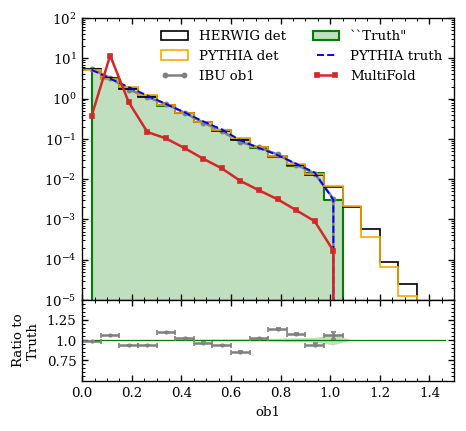

[0.525 0.575 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075
 1.125 1.175 1.225 1.275 1.325 1.375 1.425 1.475]


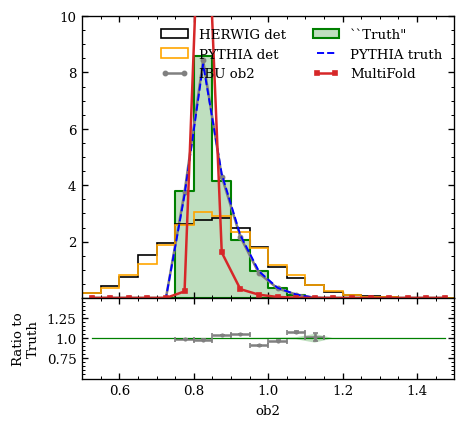

In [27]:
for i,(obkey,ob) in enumerate(obs.items()):
    
    # get the styled axes on which to plot
    fig, [ax0, ax1] = axes(**ob)
    if ob.get('yscale') is not None:
        ax0.set_yscale(ob['yscale'])
    #ax0.set_yscale('log')

        
    # Plot the Different Distributions of the Observable
    # plot the "data" histogram of the observable
    ax0.hist(ob['dataobs'], bins=ob['bins_det'], color='black', label='HERWIG det', **hist_style)

    # plot the "sim" histogram of the observable
    ax0.hist(ob['simobs'], bins=ob['bins_det'], color='orange', label='PYTHIA det', **hist_style)

    # plot the "gen" histogram of the observable
    ax0.plot(ob['midbins_mc'], ob['genobs_hist'], **gen_style)

    # plot the "truth" histogram of the observable
    ax0.fill_between(ob['midbins_mc'], ob['truth_hist'], **truth_style)

    
    # Plot the Unfolded Distributions of the Observable
    # plot the OmniFold distribution
    of_histgen, of_histgen_unc = modplot.calc_hist(ob['genobs'], weights=multifold_ws[2*itnum], 
                                                   bins=ob['bins_mc'], density=True)[:2]
    ax0.plot(ob['midbins_mc'], of_histgen, **omnifold_style, label='MultiFold')
           
    # plot the IBU distribution
    ax0.plot(ob['midbins_mc'], ob['ibu_phis'][itnum], **ibu_style, label='IBU ' + ob['symbol'])

    # Plot the Ratios of the OmniFold and IBU distributions to truth (with statistical uncertainties)
    ibu_ratio = ob['ibu_phis'][itnum]/(ob['truth_hist'] + 10**-50)
    of_ratio = of_histgen/(ob['truth_hist'] + 10**-50)
    ax1.plot([np.min(ob['midbins_mc']), np.max(ob['midbins_mc'])], [1, 1], '-', color='green', lw=0.75)
    
    # ratio uncertainties
    truth_unc_ratio = ob['truth_hist_unc']/(ob['truth_hist'] + 10**-50)
    ibu_unc_ratio = ob['ibu_phi_unc']/(ob['truth_hist'] + 10**-50)
    of_unc_ratio = of_histgen_unc/(ob['truth_hist'] + 10**-50)
    
    ax1.fill_between(ob['midbins_mc'], 1 - truth_unc_ratio, 1 + truth_unc_ratio, 
                     facecolor=truth_style['facecolor'], zorder=-2)
    ax1.errorbar(ob['midbins_mc'], ibu_ratio, xerr=ob['binwidth_mc']/2, yerr=ibu_unc_ratio, 
                                              color=ibu_style['color'], **modplot.style('errorbar'))
    ax1.errorbar(ob['midbins_mc'], of_ratio, xerr=ob['binwidth_mc']/2, yerr=of_unc_ratio, 
                                              color=omnifold_style['color'], **modplot.style('errorbar'))
    
    print(ob['midbins_mc'])
    # legend style and ordering
    loc, ncol = ob.get('legend_loc', 'upper right'), ob.get('legend_ncol', 2)
    order = [3, 4, 2, 5, 0, 1] if ncol==2 else [3, 5, 4, 0, 2, 1]
    modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

    plt.show()